In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [24]:
import os
from pathlib import Path

import requests
from PIL import Image

from segmenter_api.domain.factory.detector_factory import DetectorType
from segmenter_api.domain.factory.segmenter_factory import SegmenterType
from segmenter_api.usecase.ui.foreground_segment import (
    ForegroundSegmentRequest,
)
from segmenter_api.usecase.ui.text2segment import (
    Text2SegmentRequest,
)
from segmenter_api.utils.google import get_authorized_headers
from segmenter_api.utils.image import base642pil, pil2base64

In [23]:
audience_url = os.environ["CLOUD_RUN_URL"]
text2segment_url = f"{audience_url}/text2segment"
foreground_segment_url = f"{audience_url}/foreground_segment"

In [32]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path)

In [13]:
# Text2Segment

In [14]:
text2segment_request = Text2SegmentRequest(
    detector_type=DetectorType.FLORENCE2_BASE,
    segmenter_type=SegmenterType.SAM2,
    image=pil2base64(image=image),
    texts=["plastic bottle", "green character"],
)

In [15]:
text2segment_request_data = text2segment_request.model_dump()

In [16]:
print(text2segment_request_data["detector_type"])
print(text2segment_request_data["segmenter_type"])
print(text2segment_request_data["image"][:30])
print(text2segment_request_data["texts"])

florence2_base
sam2
iVBORw0KGgoAAAANSUhEUgAABAAAAA
['plastic bottle', 'green character']


In [25]:
text2segment_response = requests.post(
    url=text2segment_url,
    json=text2segment_request_data,
    headers=get_authorized_headers(audience_url),
)
text2segment_response_data = text2segment_response.json()
text2segment_boolean_masks = text2segment_response_data["masks"]
text2segment_labels = text2segment_response_data["labels"]
text2segment_mask_images = [
    base642pil(boolean_mask) for boolean_mask in text2segment_boolean_masks
]

In [26]:
text2segment_response.text

'{"labels":["plastic bottle","green character"],"masks":["iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAAAAABadnRfAAAM6UlEQVR4nO3d3XLbthpAUeS8/zv3XCRp/SebEkmJwF7rtjMtMcC3CSmOOwYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAs59erHyDnn5v/xF7wdA7d09ye/HfsCE/kuD3FxuH/y67wJI7aye4c/bfsDadzyM60Y/p/sz2cywk7ze7pH2PYIM7lfJ3jmOkfY9gizuR0neHA8R/DJnEeZ+t4B4//GMM+cRIH62hnjP+wUZzDuTrWSeM/hq3iDP979QOs5cT5P/XfTZUAHOncGVUADudeeZzzB9RucTBH6jBPeUHbLw7lI8BRnnNB9zGAQwnAQUwmMxKAYzxt/oWGIwnAIZ44lgrAgQTgCE8dSgXgOAJwACPJrARgPnrDYQRgPwPJtARgt+fPv+JwFAGYkQJwEAGAMAHYy9uYiQnAlFSHYwjATkaRmQkAhAkAhAkAhAkAhAnAPr4DZGoCAGECMCc3Dw4hABAmABAmABAmABAmABAmABAmABAmAJPygwAcQQAgTAAgTAAgTAAgTAAgTAB28V08cxMACBMACBMACBMACBMACBOAXX697j/tDyA4gABAmADM6oWXD9YhABAmABAmALPyJSAHEAAIEwAIEwAIEwAIEwAIE4BZ+UEgDiAAECYAs/JzABxAACBMACBMACBMACBMACBMACBMAC

In [27]:
text2segment_labels

['plastic bottle', 'green character']

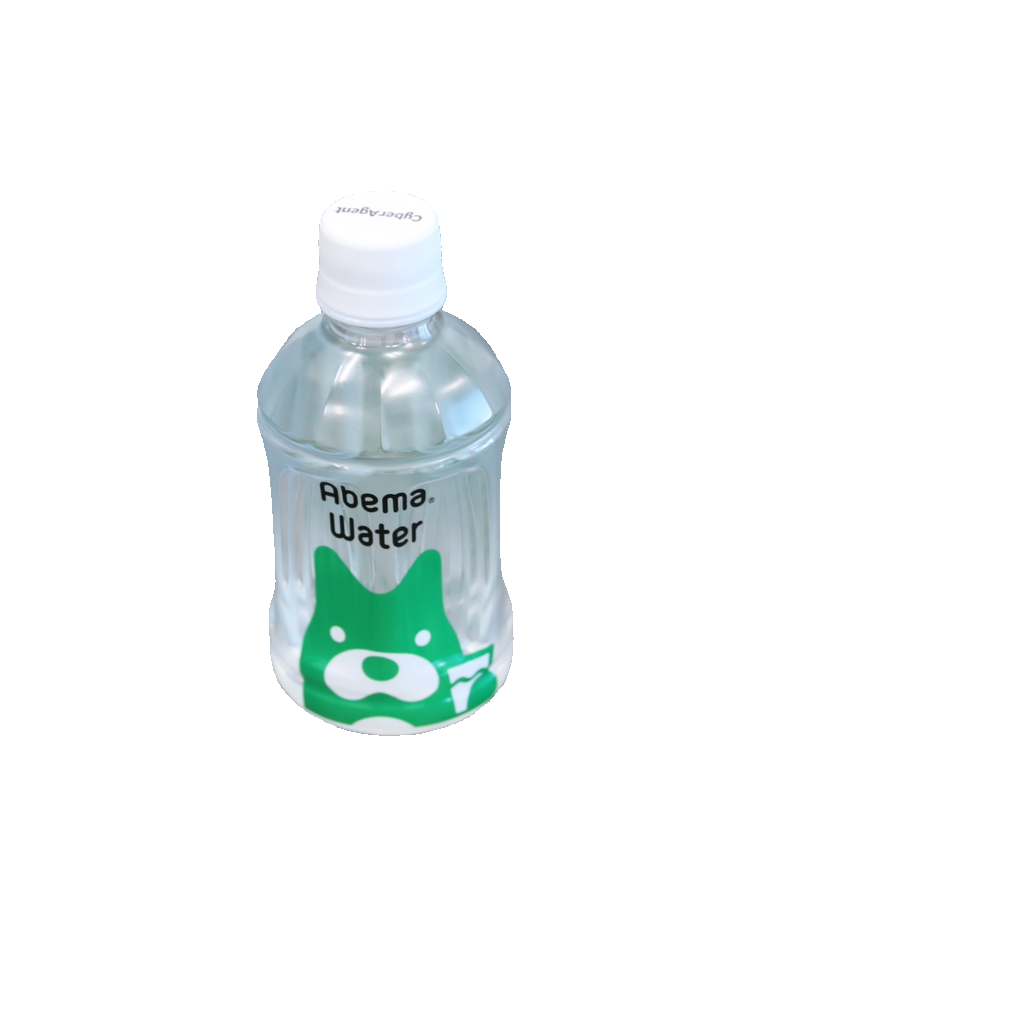

In [33]:
segment_image = image.copy()
segment_image.putalpha(text2segment_mask_images[0])
segment_image

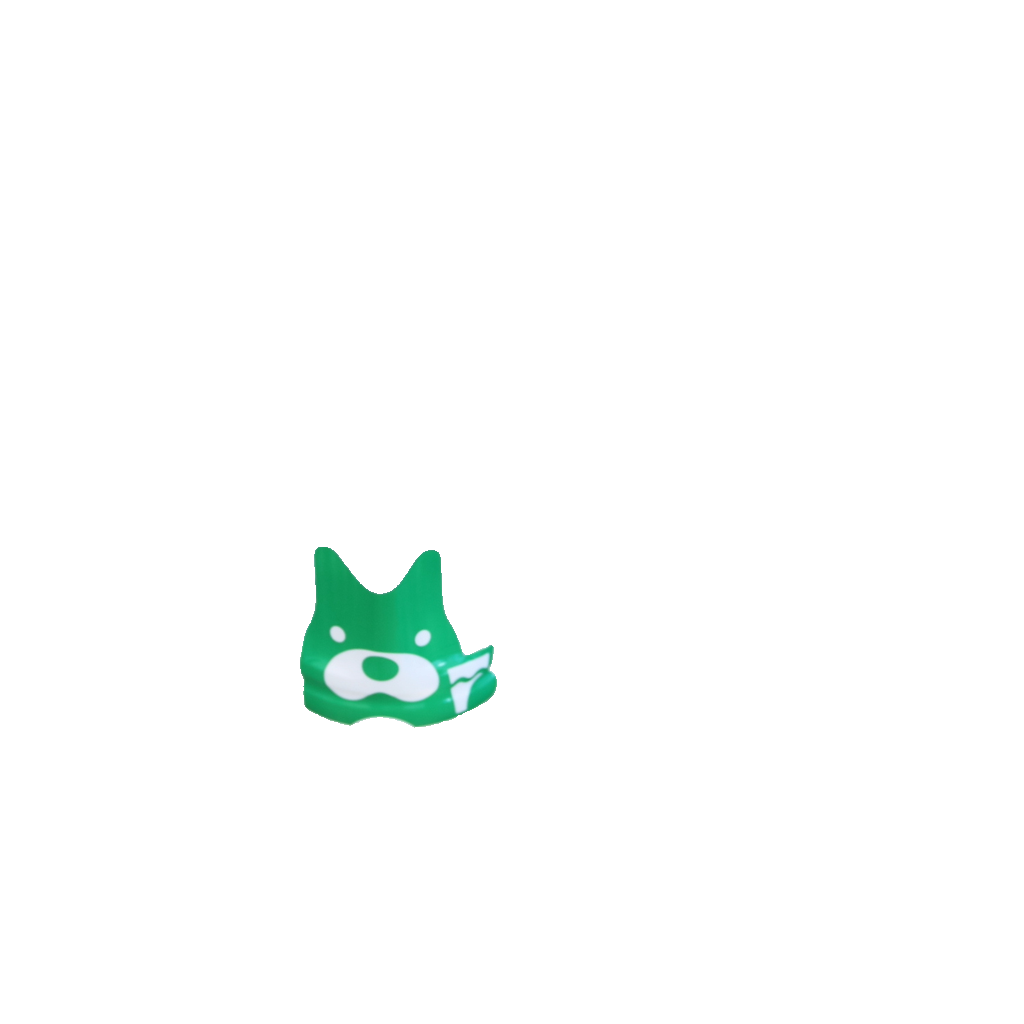

In [34]:
segment_image = image.copy()
segment_image.putalpha(text2segment_mask_images[1])
segment_image.show()


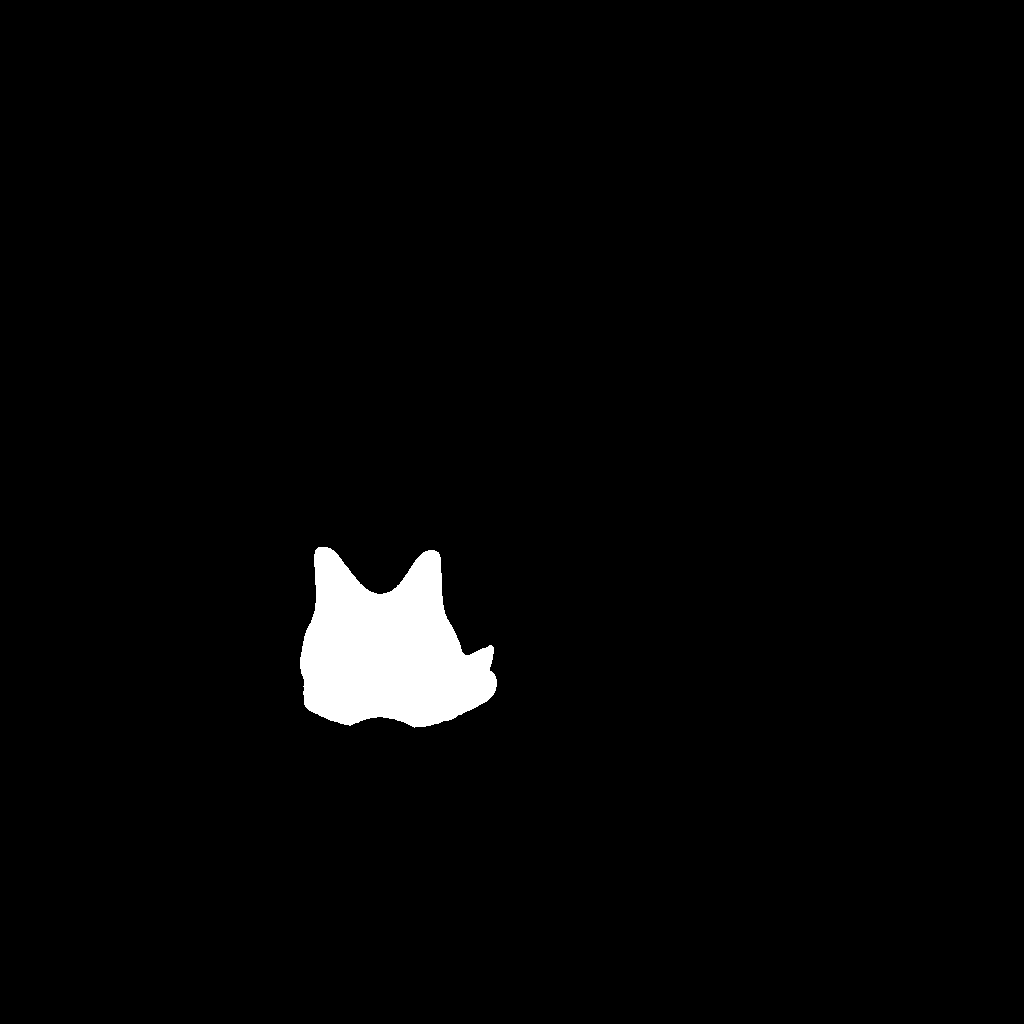

In [29]:
text2segment_mask_images[1]

In [35]:
# ForegroundSegment
foreground_segment_request = ForegroundSegmentRequest(
    image=pil2base64(image=image),
    segmenter_type=SegmenterType.BIREFNET,
)
foreground_segment_request_data = foreground_segment_request.model_dump()


In [36]:
print(foreground_segment_request_data["segmenter_type"])
print(foreground_segment_request_data["image"][:30])

birefnet
iVBORw0KGgoAAAANSUhEUgAABAAAAA


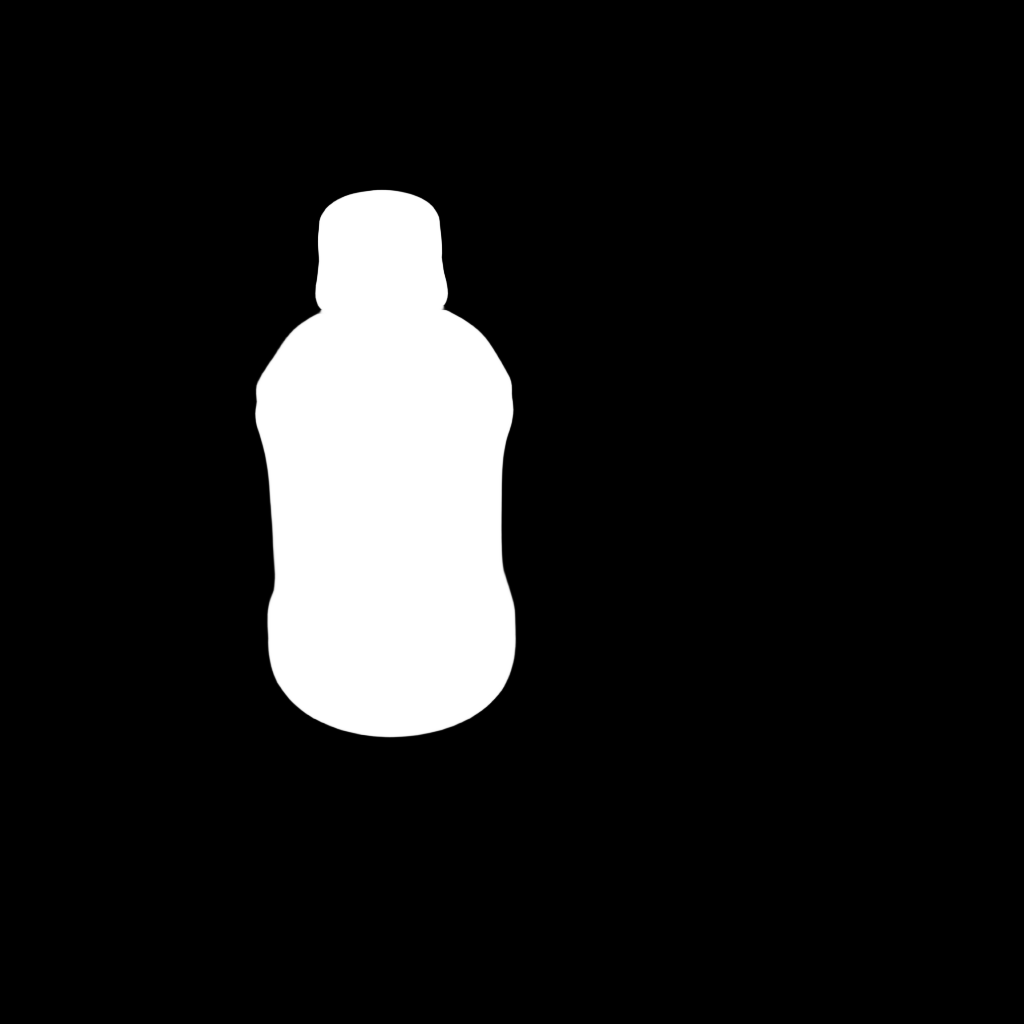

In [38]:
foreground_segment_response = requests.post(
    url=foreground_segment_url,
    json=foreground_segment_request_data,
    headers=get_authorized_headers(audience_url),
)
foreground_segment_response_data = foreground_segment_response.json()
foreground_segment_mask = foreground_segment_response_data["mask"]
foreground_segment_mask_image = base642pil(foreground_segment_mask)
foreground_segment_mask_image


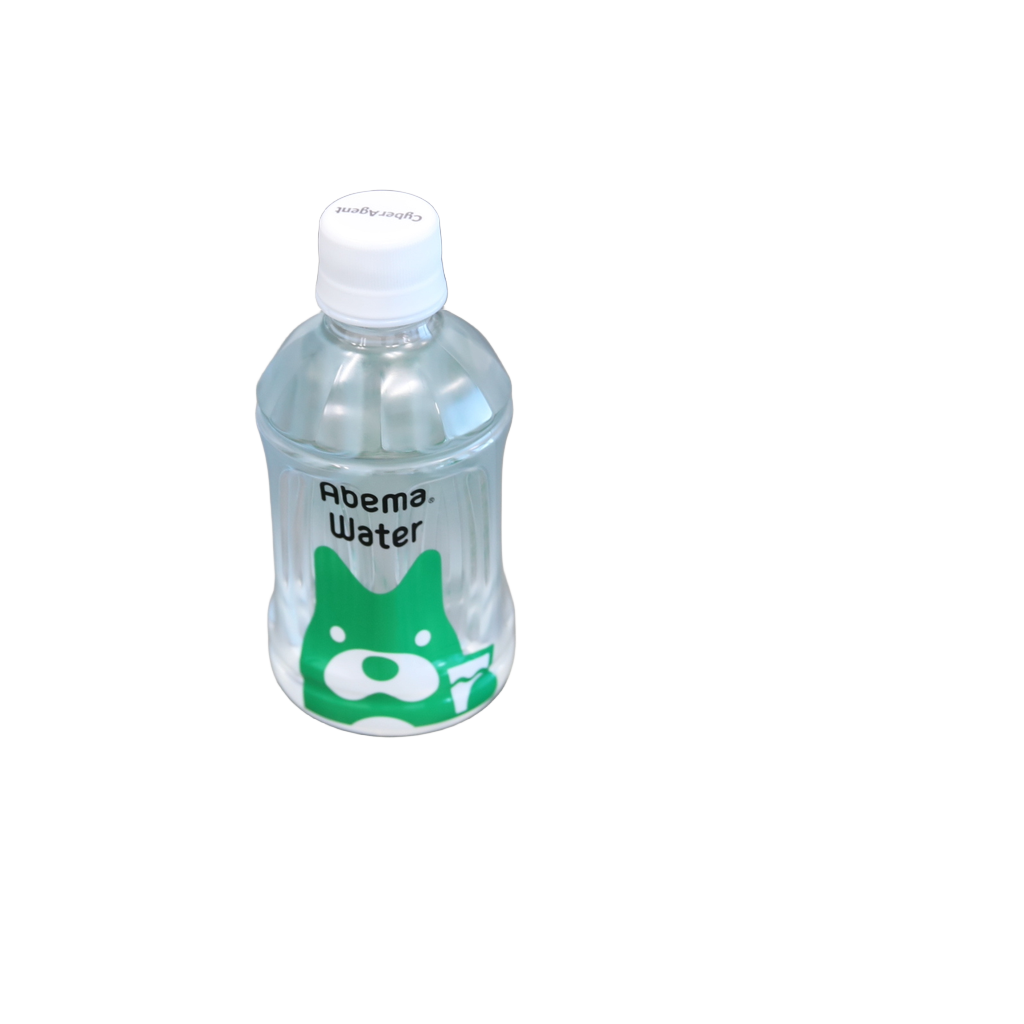

In [39]:
segment_image = image.copy()
segment_image.putalpha(foreground_segment_mask_image)
segment_image.show()
